In [6]:
import os
from getpass import getpass

if not os.path.exists(os.path.expanduser("~/.kaggle/kaggle.json")):
    kaggle_username = getpass("Kaggle username: ")
    kaggle_api_key = getpass("Kaggle API key: ")

    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

    with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
        f.write('{"username":"' + kaggle_username + '","key":"' + kaggle_api_key + '"}')
        os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"),0o600)

Kaggle username: ··········
Kaggle API key: ··········


In [7]:
!kaggle datasets download -d samuelcortinhas/sports-balls-multiclass-image-classification

 96% 386M/401M [00:05<00:00, 44.3MB/s]
100% 401M/401M [00:06<00:00, 69.9MB/s]


In [8]:

import os
import zipfile
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [9]:
local_zip = '/content/sports-balls-multiclass-image-classification.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [10]:
!pip install split-folders

In [11]:
os.mkdir('data')

In [12]:
shutil.move('test', 'data')
shutil.move('train', 'data')

'data/train'

# show some images

In [43]:
import os
import matplotlib.pyplot as plt

base_path = '/content/data/train'


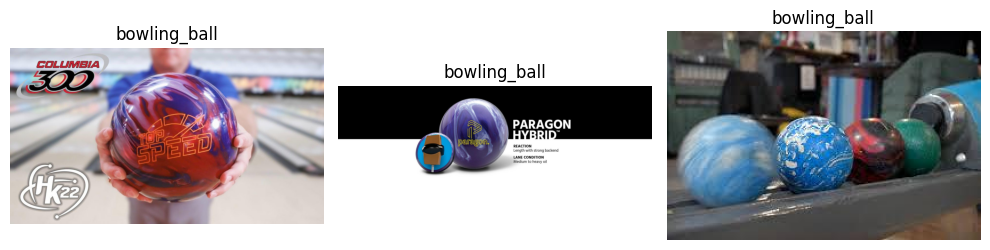

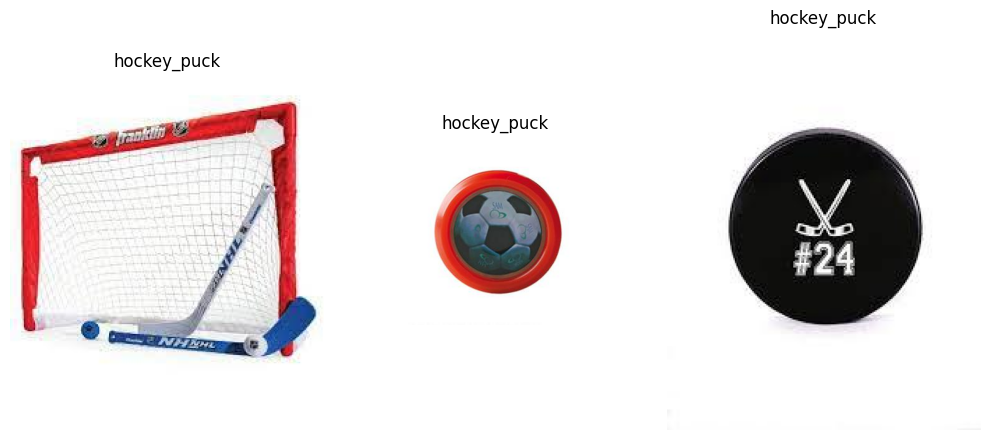

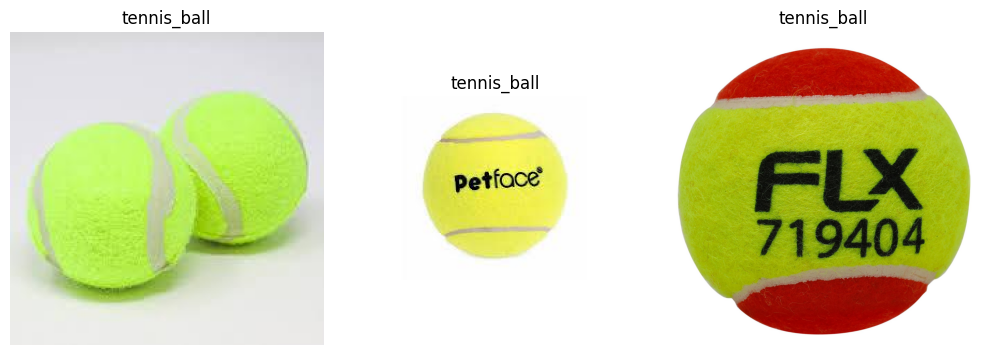

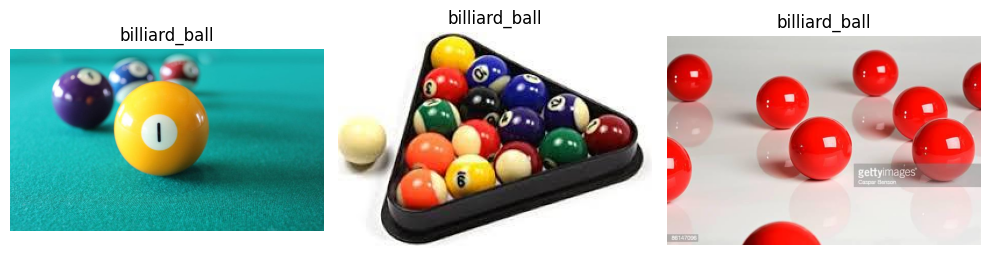

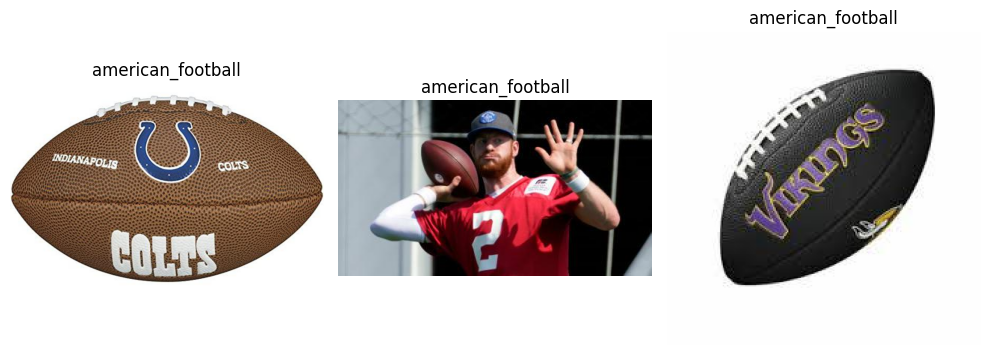

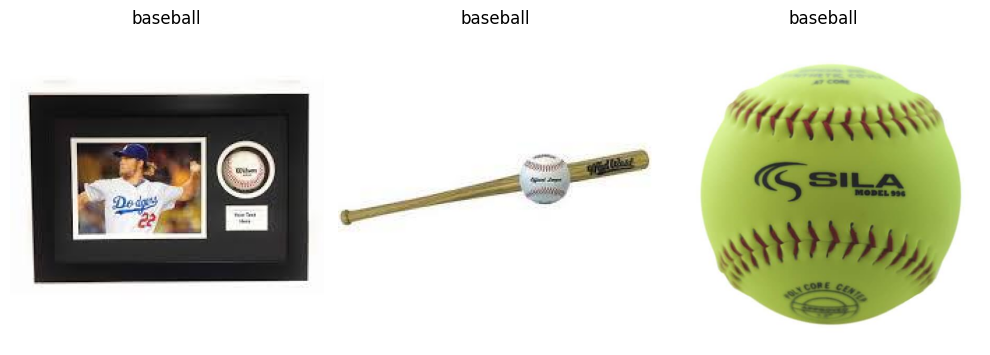

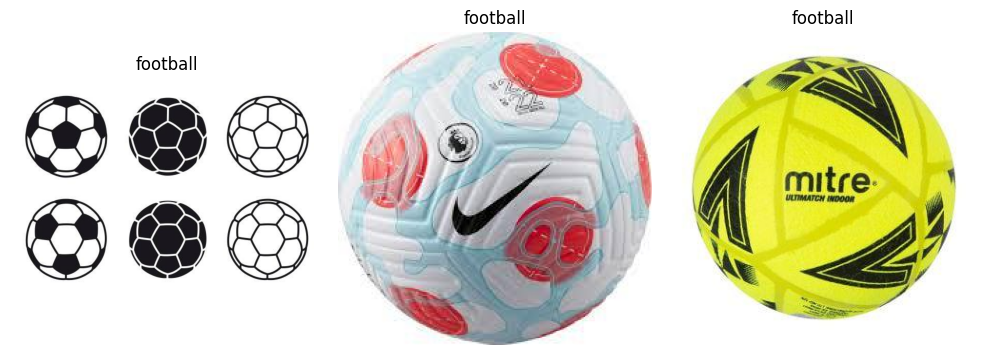

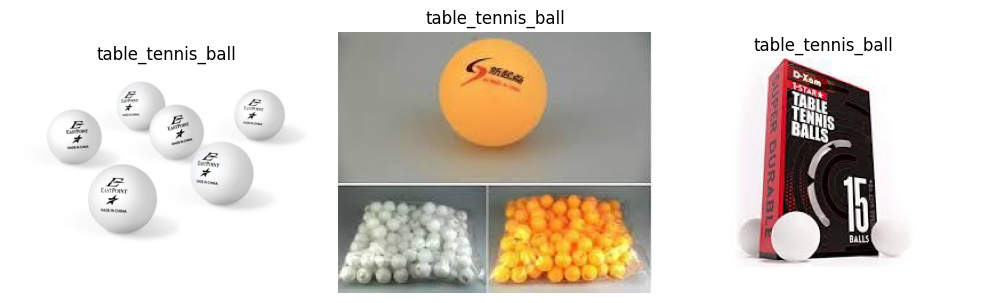

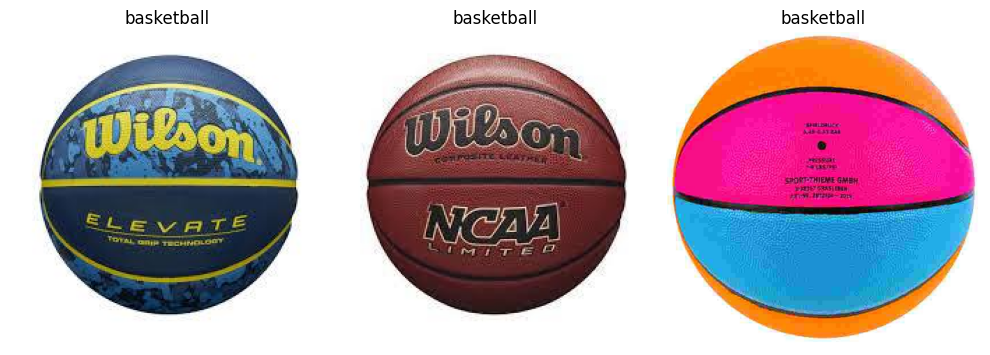

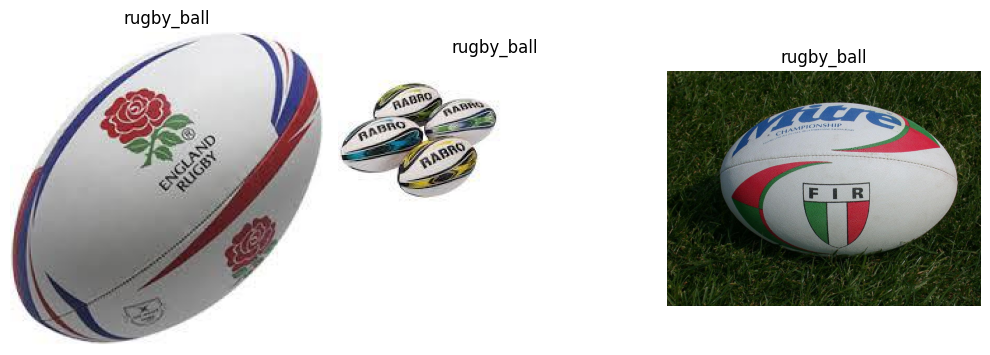

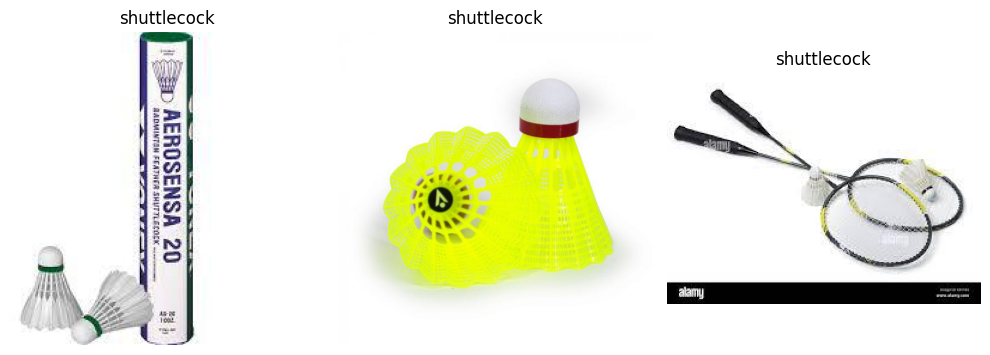

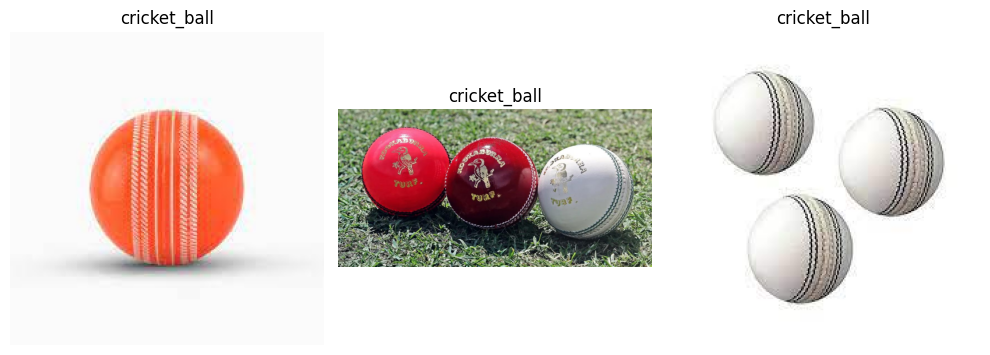

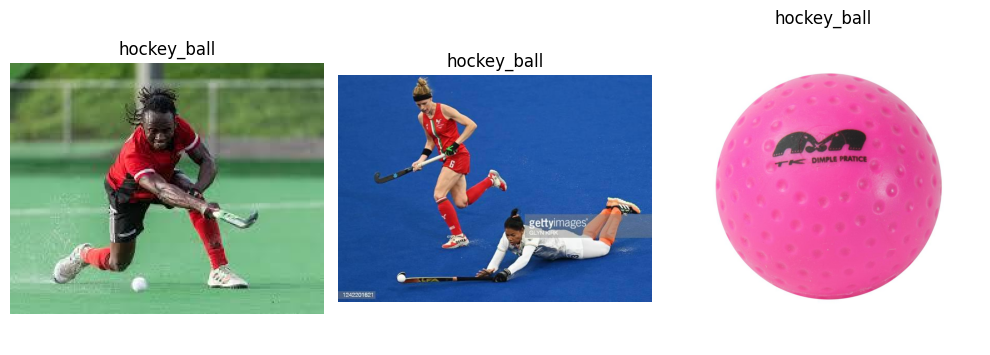

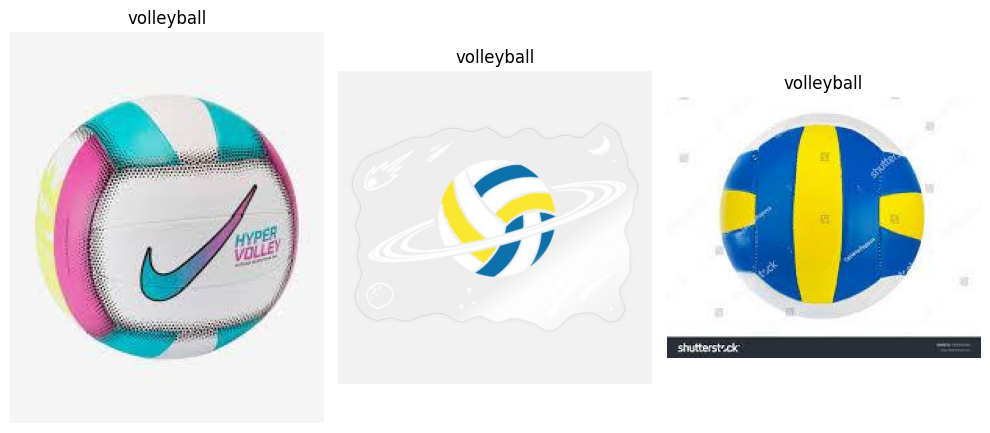

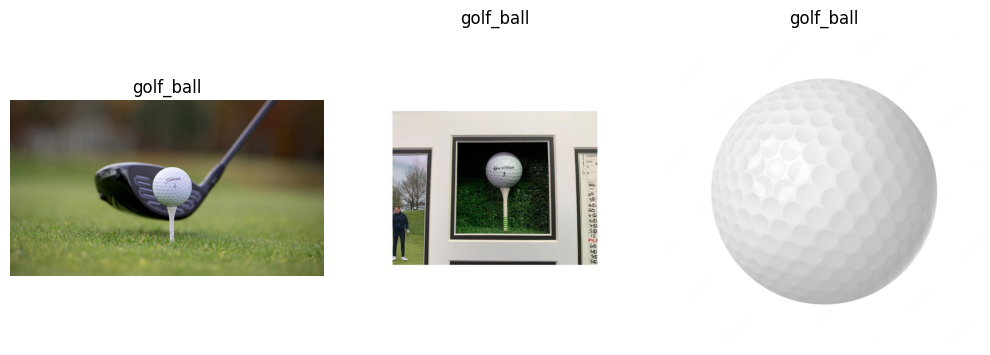

In [47]:

for folder in os.listdir(base_path):

    folder_path = os.path.join(base_path, folder)
    image_paths = [os.path.join(folder_path, image) for image in os.listdir(folder_path)[:3]]
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    for i, image_path in enumerate(image_paths):
        image = plt.imread(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"{folder}")
        axes[i].axis('off')

    fig.tight_layout()

    plt.show()

In [15]:
train_gen = ImageDataGenerator(rescale=1/255, horizontal_flip=True,
                               rotation_range=40,
                               zoom_range=0.3)

train_data = train_gen.flow_from_directory("data/train",
                                           class_mode='categorical',
                                           batch_size=40,
                                           target_size=(150, 150))

test_gen = ImageDataGenerator(rescale=1/255)

test_data = test_gen.flow_from_directory('data/test', class_mode='categorical',  batch_size=40, target_size=(150, 150))

Found 7328 images belonging to 15 classes.
Found 1841 images belonging to 15 classes.


In [17]:
from keras.applications import inception_v3
from keras.layers import Flatten, Dense, Dropout, Input
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping

In [16]:
trainable_model = inception_v3.InceptionV3(include_top=False,
                                           input_shape=(150, 150, 3))

for layer in trainable_model.layers:
  layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
trainable_model.summary()

In [20]:
output_layer = trainable_model.get_layer('mixed7')

x = Flatten()(output_layer.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dense(15, activation='softmax')(x)

model = Model(inputs=trainable_model.input, outputs=x)

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

hist = model.fit(train_data, batch_size=40, epochs=10, validation_data=test_data)

Epoch 1/10
184/184 [==============================] - 73s 371ms/step - loss: 0.4885 - acc: 0.8462 - val_loss: 0.9970 - val_acc: 0.7404
Epoch 2/10
184/184 [==============================] - 67s 364ms/step - loss: 0.4076 - acc: 0.8727 - val_loss: 0.8231 - val_acc: 0.7854
Epoch 3/10
184/184 [==============================] - 67s 367ms/step - loss: 0.3459 - acc: 0.8916 - val_loss: 0.9302 - val_acc: 0.7594
Epoch 4/10
184/184 [==============================] - 67s 362ms/step - loss: 0.3270 - acc: 0.8930 - val_loss: 0.9038 - val_acc: 0.7865
Epoch 5/10
184/184 [==============================] - 75s 409ms/step - loss: 0.3073 - acc: 0.9007 - val_loss: 0.8901 - val_acc: 0.7925
Epoch 6/10
184/184 [==============================] - 67s 364ms/step - loss: 0.2786 - acc: 0.9095 - val_loss: 0.9403 - val_acc: 0.7887
Epoch 7/10
184/184 [==============================] - 67s 362ms/step - loss: 0.2475 - acc: 0.9194 - val_loss: 0.9479 - val_acc: 0.7811
Epoch 8/10
184/184 [==============================] - 6

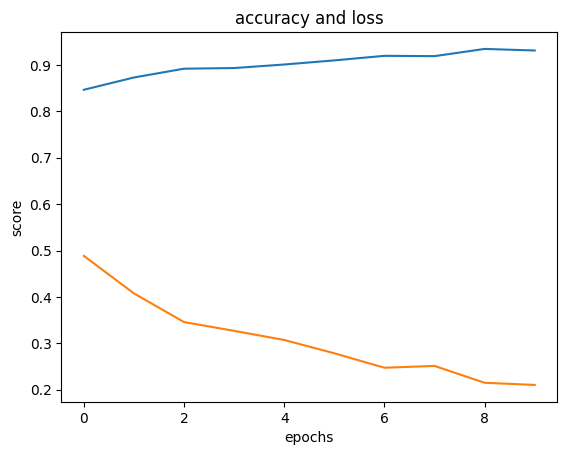

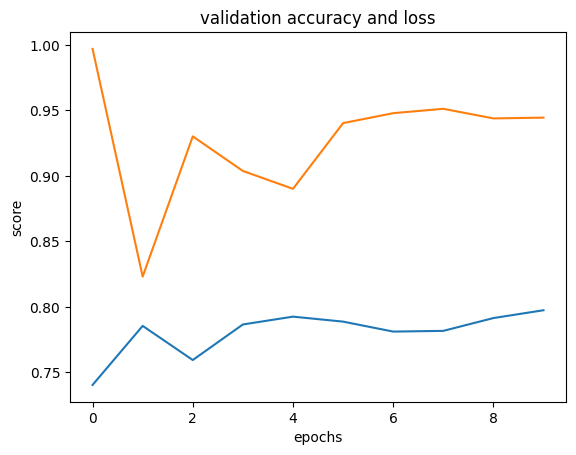

In [31]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(accuracy)
plt.plot(loss)
plt.title("accuracy and loss")
plt.xlabel('epochs')
plt.ylabel('score')

plt.show()

plt.plot(val_accuracy)
plt.plot(val_loss)
plt.title("validation accuracy and loss")
plt.xlabel('epochs')
plt.ylabel('score')

plt.show()


In [48]:
model.evaluate(test_data)

47/47 [==============================] - 7s 140ms/step - loss: 0.9445 - acc: 0.7974


[0.9444999098777771, 0.797392725944519]